# Regresión
# K-vecinos más cercanos (KNN)

## Importar librerías

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math

## Cargar Dataframe

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/opcruz/datasets/main/Auto.csv", sep=",")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
#Revisar la cantidad filas y el número de variables
df.shape

(397, 9)

In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [8]:
# revisando los datos, algunas instancias tienen un valor ? en horsepower
df = df[df.horsepower != '?']
df['horsepower'] = df['horsepower'].astype(float)

#Revisar la cantidad filas y el número de variables
df.shape

(392, 9)

In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


## Graficar datos por pares

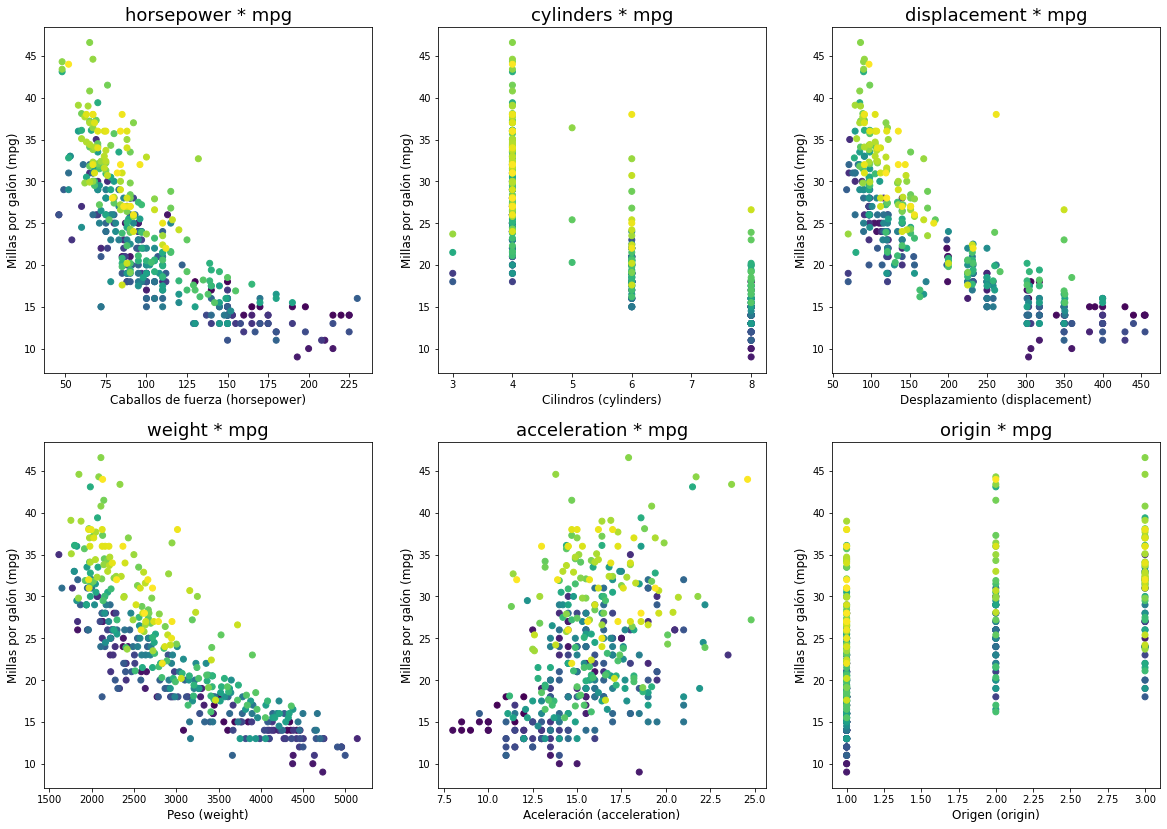

In [11]:
fig = plt.figure(figsize=(20, 14))
ax = fig.subplots(2, 3)

ax[0, 0].set_title("horsepower * mpg", fontsize=18)
ax[0, 0].set_ylabel("Millas por galón (mpg)", size=12)
ax[0, 0].set_xlabel("Caballos de fuerza (horsepower)", size=12)
ax[0, 0].scatter(df["horsepower"], df["mpg"], c=range(df["mpg"].size))

ax[0, 1].set_title("cylinders * mpg", fontsize=18)
ax[0, 1].set_ylabel("Millas por galón (mpg)", size=12)
ax[0, 1].set_xlabel("Cilindros (cylinders)", size=12)
ax[0, 1].scatter(df["cylinders"], df["mpg"], c=range(df["mpg"].size))

ax[0, 2].set_title("displacement * mpg", fontsize=18)
ax[0, 2].set_ylabel("Millas por galón (mpg)", size=12)
ax[0, 2].set_xlabel("Desplazamiento (displacement)", size=12)
ax[0, 2].scatter(df["displacement"], df["mpg"], c=range(df["mpg"].size))

ax[1, 0].set_title("weight * mpg", fontsize=18)
ax[1, 0].set_ylabel("Millas por galón (mpg)", size=12)
ax[1, 0].set_xlabel("Peso (weight)", size=12)
ax[1, 0].scatter(df["weight"], df["mpg"], c=range(df["mpg"].size))

ax[1, 1].set_title("acceleration * mpg", fontsize=18)
ax[1, 1].set_ylabel("Millas por galón (mpg)", size=12)
ax[1, 1].set_xlabel("Aceleración (acceleration)", size=12)
ax[1, 1].scatter(df["acceleration"], df["mpg"], c=range(df["mpg"].size))

ax[1, 2].set_title("origin * mpg", fontsize=18)
ax[1, 2].set_ylabel("Millas por galón (mpg)", size=12)
ax[1, 2].set_xlabel("Origen (origin)", size=12)
ax[1, 2].scatter(df["origin"], df["mpg"], c=range(df["mpg"].size))

plt.show()

# Método Manual (sin usar librerías)

#### Definir funciones

In [12]:
def split_dataset(dataset, approx_training_perc=0.6):
    # convierte el dataframe en una lista de listas
    l = dataset.values.tolist()
    # separa, aleatoriamente, un conjunto de instancias como el conjunto entrenamiento
    # y el resto, será un conjunto de pruebas
    training_set = []
    test_set = []
    for instance in l:
        if random.random() < approx_training_perc:
            training_set.append(instance)
        else:
            test_set.append(instance)
    return (training_set, test_set)


# función que calcula la distancia euclidiana entre dos instancias
def euclidian_distance(instance1, instance2, n_features):
    dist = 0
    for x in range(n_features):
        dist += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(dist)


# obtiene los K vecinos más cercanos
def get_neighbors(training_set, test_instance, k):
    distances = []
    for training_instance in training_set:
        dist = euclidian_distance(test_instance, training_instance, len(training_instance) - 1)
        distances.append((dist, training_instance))
    distances.sort()
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])
    return neighbors

def predict_value(neighbors):
    return sum([neighbor[-1] for neighbor in neighbors]) / len(neighbors)

def regressor_predict(training_set, test_set, k):
    predictions = []
    for instance in test_set:
        neighbors = get_neighbors(training_set, instance, k)
        result = predict_value(neighbors)
        predictions.append(result)
        print('> predicted=' + str(result) + ', actual=' + str(instance[-1]))
    return predictions


#### Dividir en conjunto de pruebas y entrenamiento

In [13]:
# Tomando solo la característica de caballos de fuerza
df2 = df[["horsepower", "mpg"]]

(training_set, test_set) = split_dataset(df2, .8)

print("Datos originales", df2.shape[0])
print("Datos para el entrenamiento", len(training_set))
print("Datos para prueba", len(test_set))

Datos originales 392
Datos para el entrenamiento 311
Datos para prueba 81


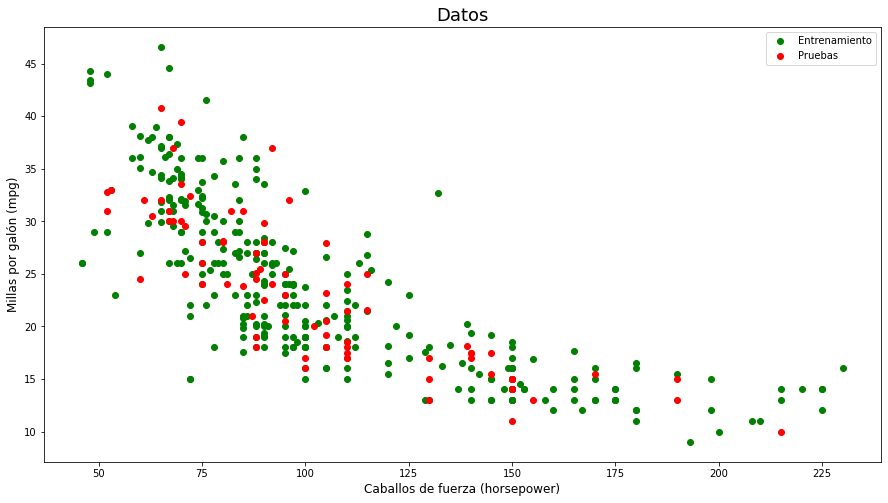

In [14]:
fig = plt.figure(figsize=(15, 8))

X_train = [row[0] for row in training_set]
y_train = [row[1] for row in training_set]

X_test = [row[0] for row in test_set]
y_test = [row[1] for row in test_set]

plt.title("Datos", fontsize=18)
plt.ylabel("Millas por galón (mpg)", size=12)
plt.xlabel("Caballos de fuerza (horsepower)", size=12)
plt.scatter(X_train, y_train, c="green", label='Entrenamiento')
plt.scatter(X_test, y_test, c="red", label='Pruebas')
plt.legend()

plt.show()

#### Entrenamiento k = 15

In [15]:
predictions = regressor_predict(training_set, test_set, k = 15)


> predicted=15.879999999999997, actual=17.0
> predicted=13.066666666666666, actual=15.0
> predicted=25.86, actual=27.0
> predicted=22.573333333333334, actual=25.0
> predicted=12.766666666666667, actual=10.0
> predicted=23.386666666666663, actual=28.0
> predicted=20.006666666666664, actual=17.0
> predicted=19.766666666666666, actual=18.0
> predicted=23.386666666666663, actual=28.0
> predicted=31.71333333333333, actual=30.0
> predicted=14.733333333333333, actual=15.0
> predicted=14.026666666666667, actual=13.0
> predicted=13.066666666666666, actual=13.0
> predicted=18.273333333333333, actual=13.0
> predicted=23.259999999999998, actual=21.0
> predicted=27.28666666666667, actual=28.0
> predicted=14.733333333333333, actual=15.0
> predicted=14.733333333333333, actual=14.0
> predicted=20.006666666666664, actual=16.0
> predicted=25.86, actual=18.0
> predicted=14.733333333333333, actual=11.0
> predicted=30.073333333333334, actual=24.0
> predicted=14.733333333333333, actual=15.0
> predicted=19.7

#### Métricas

In [16]:
from sklearn.metrics import r2_score
from sklearn import metrics

y_test = [instance[-1] for instance in test_set]

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Coefficient of determination: %.2f' % r2_score(y_test, predictions))

Mean Absolute Error: 2.9786831275720167
Mean Squared Error: 15.765337174211249
Root Mean Squared Error: 3.9705587987349147
Coefficient of determination: 0.69


## Graficar Regresión

In [29]:
horsepower_range = np.arange(df["horsepower"].min(), df["horsepower"].max(), 1)
horsepower_range_shaped = [[value, 'unknown'] for value in horsepower_range]

mpg_predicted = regressor_predict(training_set, horsepower_range_shaped, k = 11)


> predicted=34.25454545454546, actual=unknown
> predicted=34.25454545454546, actual=unknown
> predicted=34.25454545454546, actual=unknown
> predicted=34.25454545454546, actual=unknown
> predicted=34.25454545454546, actual=unknown
> predicted=34.25454545454546, actual=unknown
> predicted=34.25454545454546, actual=unknown
> predicted=35.445454545454545, actual=unknown
> predicted=35.53636363636363, actual=unknown
> predicted=33.581818181818186, actual=unknown
> predicted=33.654545454545456, actual=unknown
> predicted=33.654545454545456, actual=unknown
> predicted=33.599999999999994, actual=unknown
> predicted=34.054545454545455, actual=unknown
> predicted=35.50909090909091, actual=unknown
> predicted=35.50909090909091, actual=unknown
> predicted=34.21818181818182, actual=unknown
> predicted=34.309090909090905, actual=unknown
> predicted=35.79090909090909, actual=unknown
> predicted=35.618181818181824, actual=unknown
> predicted=34.00909090909091, actual=unknown
> predicted=34.38181818181

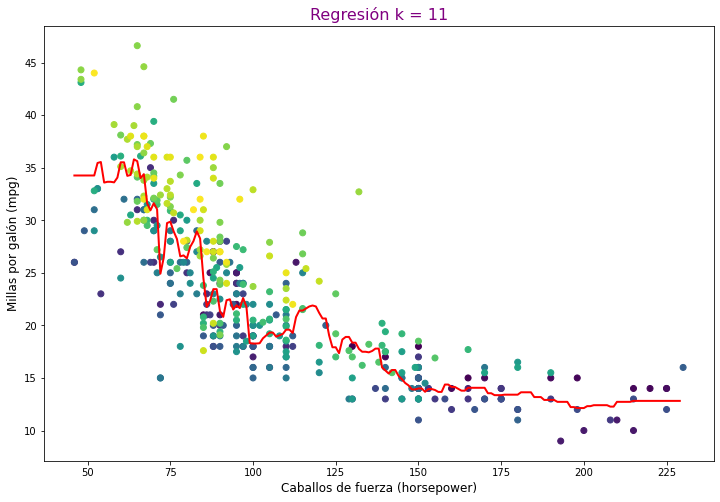

In [30]:
plt.figure(figsize=(12, 8))

plt.plot(horsepower_range, mpg_predicted, linewidth=2, color="red")
plt.scatter(df["horsepower"], df["mpg"], c=range(df["mpg"].size))

plt.title("Regresión k = 11", size=16, color="purple")
plt.ylabel("Millas por galón (mpg)", size=12)
plt.xlabel("Caballos de fuerza (horsepower)", size=12)
plt.show()

# Refresión Lineal usando la librería '*sklearn*'

## Dividir los datos en conjuntos de prueba y entrenamiento

In [18]:
from sklearn.model_selection import train_test_split

X = df["horsepower"]
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2021)

print("Datos originales", X.shape[0])
print("Datos para el entrenamiento", X_train.shape[0])
print("Datos para prueba", X_test.shape[0])

Datos originales 392
Datos para el entrenamiento 313
Datos para prueba 79


## Escalado y normalización de los datos

In [19]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
#scaling the training set
X_train_scaled = sc.fit_transform(X_train.values.reshape(-1, 1))
#scaling the test set
X_test_scaled = sc.transform(X_test.values.reshape(-1, 1))
X_train_scaled[0:5]

array([[0.70108696],
       [0.56521739],
       [0.32065217],
       [0.34782609],
       [0.13043478]])

## Graficar datos escalados

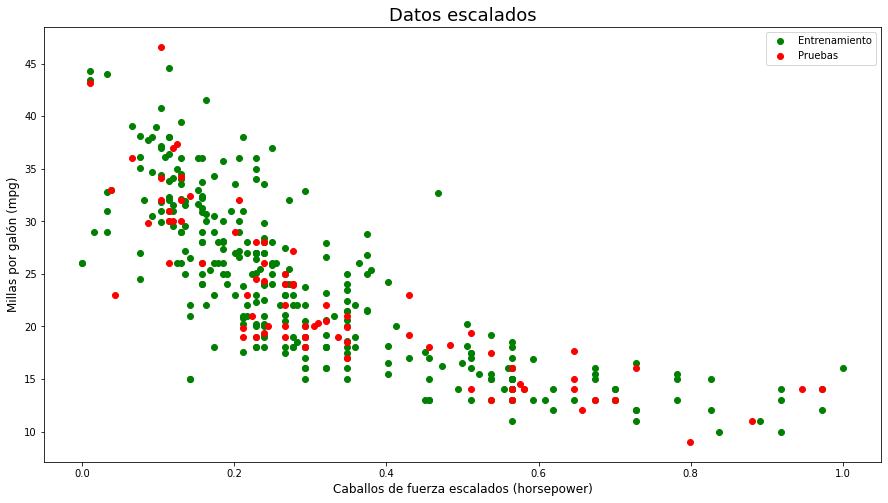

In [20]:
fig = plt.figure(figsize=(15, 8))

plt.title("Datos escalados", fontsize=18)
plt.ylabel("Millas por galón (mpg)", size=12)
plt.xlabel("Caballos de fuerza escalados (horsepower)", size=12)
plt.scatter(X_train_scaled, y_train.values, c="green", label='Entrenamiento')
plt.scatter(X_test_scaled, y_test.values, c="red", label='Pruebas')
plt.legend()

plt.show()

## Implementación del algoritmo KNN con SKlearn (k = 5)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

KNN_reg = KNeighborsRegressor(n_neighbors=5)
# Entrenamiento del modelo
regressor = KNN_reg.fit(X_train_scaled, y_train)
#Predición de modelo
y_pred_knn = regressor.predict(X_test_scaled)
y_pred_knn

array([33.96, 30.9 , 15.54, 32.1 , 33.74, 20.  , 21.  , 22.12, 23.8 ,
       13.5 , 28.  , 22.12, 30.9 , 14.8 , 20.  , 28.  , 26.8 , 20.  ,
       33.42, 14.8 , 17.7 , 13.5 , 35.08, 35.56, 29.76, 16.12, 14.2 ,
       35.56, 22.12, 22.12, 15.54, 14.5 , 30.24, 16.2 , 17.7 , 20.4 ,
       14.38, 30.9 , 14.8 , 34.58, 20.4 , 19.92, 13.1 , 19.24, 20.  ,
       16.2 , 11.6 , 32.82, 21.  , 35.56, 13.2 , 16.12, 17.7 , 20.4 ,
       22.12, 33.42, 13.5 , 28.  , 18.6 , 14.6 , 29.9 , 13.  , 33.96,
       26.8 , 32.82, 12.6 , 23.76, 14.7 , 18.6 , 20.4 , 14.1 , 21.  ,
       19.9 , 18.5 , 17.7 , 33.42, 20.4 , 18.6 , 18.6 ])

## Cálculo de Métricas

In [22]:
from sklearn.metrics import r2_score
from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_knn))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_knn))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_knn))

Mean Absolute Error: 3.0043037974683546
Mean Squared Error: 16.40733670886076
Root Mean Squared Error: 4.050597080537727
Coefficient of determination: 0.72


## Graficar Regresión

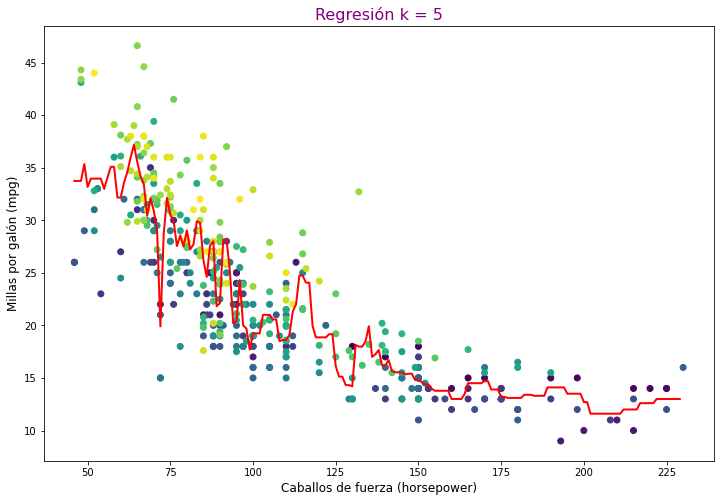

In [23]:
horsepower_range = np.arange(df["horsepower"].min(), df["horsepower"].max(), 1)

horsepower_range_scaled = sc.fit_transform(horsepower_range.reshape(-1, 1))
mpg_predicted = regressor.predict(horsepower_range_scaled)

plt.figure(figsize=(12, 8))

plt.plot(horsepower_range, mpg_predicted, linewidth=2, color="red")
plt.scatter(df["horsepower"], df["mpg"], c=range(df["mpg"].size))

plt.title("Regresión k = 5", size=16, color="purple")
plt.ylabel("Millas por galón (mpg)", size=12)
plt.xlabel("Caballos de fuerza (horsepower)", size=12)
plt.show()